<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E6%95%B0%E6%8D%AE%E5%A4%84%E7%90%86%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

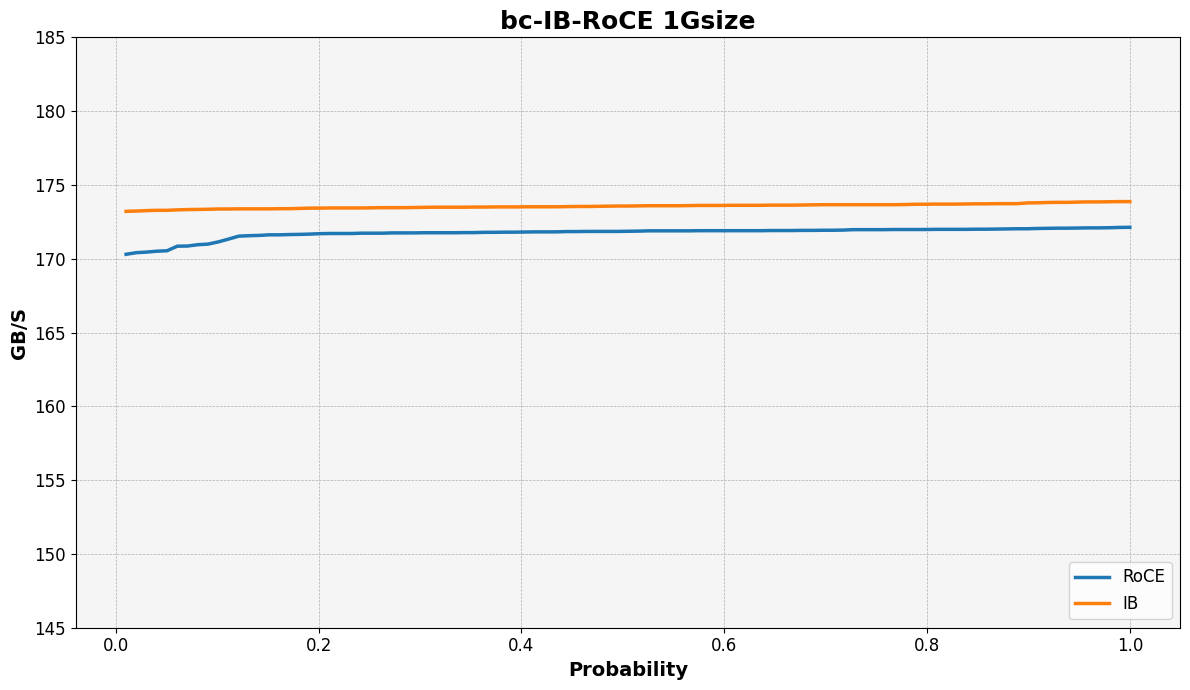

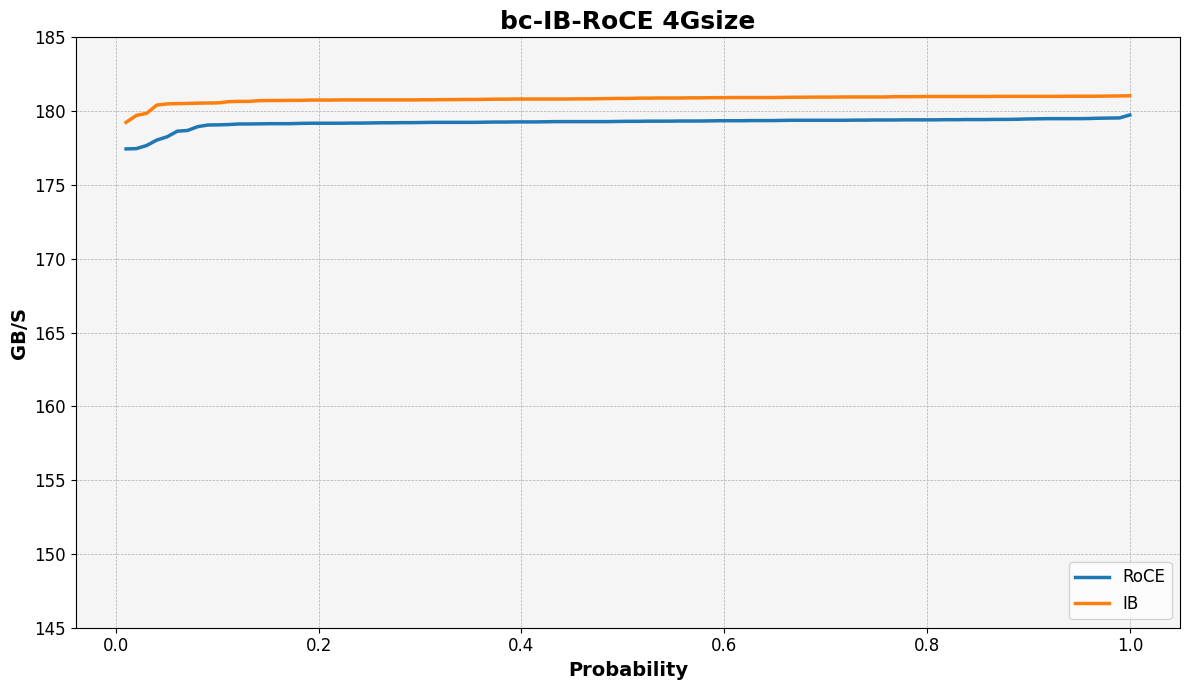

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the CDF
def compute_cdf(data):
    data_sorted = np.sort(data)
    prob = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    return data_sorted, prob

def generate_cdf_plot(data, title, y_range=(145, 185)):
    # Compute CDF for RoCE and IB columns
    roce_sorted, roce_prob = compute_cdf(data.iloc[:, 1])
    ib_sorted, ib_prob = compute_cdf(data.iloc[:, 2])

    # Create the plot
    plt.figure(figsize=(12, 7))
    plt.plot(roce_prob, roce_sorted, label='RoCE', color='#1f77b4', linewidth=2.5)
    plt.plot(ib_prob, ib_sorted, label='IB', color='#ff7f0e', linewidth=2.5)

    # Title, labels, and y-limits
    plt.title(title, fontsize=18, fontweight='bold')
    plt.ylabel('GB/S', fontsize=14, fontweight='bold')
    plt.xlabel('Probability', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(np.arange(y_range[0], y_range[1] + 1, 5), fontsize=12)
    plt.ylim(y_range)

    # Grid and legend positioned at the bottom right
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(loc='lower right', fontsize=12)

    # Background color
    ax = plt.gca()
    ax.set_facecolor('#f5f5f5')
    plt.tight_layout()
    plt.show()

# Read the 1Gsize data
data_1g = pd.read_csv('group_bc_1073741824.csv')
generate_cdf_plot(data_1g, 'bc-IB-RoCE 1Gsize')

# Read the 4Gsize data
data_4g = pd.read_csv('group_bc_4294967296.csv')
generate_cdf_plot(data_4g, 'bc-IB-RoCE 4Gsize')
